# Melakukan Import Librarise yang akan digunakan Analisis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import cv2

# Membaca Dataset Yang akan Digunakan Dalam Analisis Perpajakan

In [33]:
file_path ="/content/Rincian Pembayaran Pajak Hiburan, Reklame dan Perparkiran Menurut Bulan di Wilayah DKI Jakarta (1).csv"
df = pd.read_csv(file_path)

df.head()

,periode_data,bulan,wilayah,jenis_pajak,realisasi
0,2023,8,BARAT,HIBURAN,11.344.236.302
1,2023,8,BARAT,PARKIR,6.302.002.217
2,2023,8,BARAT,REKLAME,10.318.355.883
3,2023,8,PUSAT,HIBURAN,26.310.428.555
4,2023,8,PUSAT,PARKIR,10.361.324.885


# Membuat Grafik Mengenai Tren Pembayaran Pajak per Bulan di Daerah DKI JAKARTA

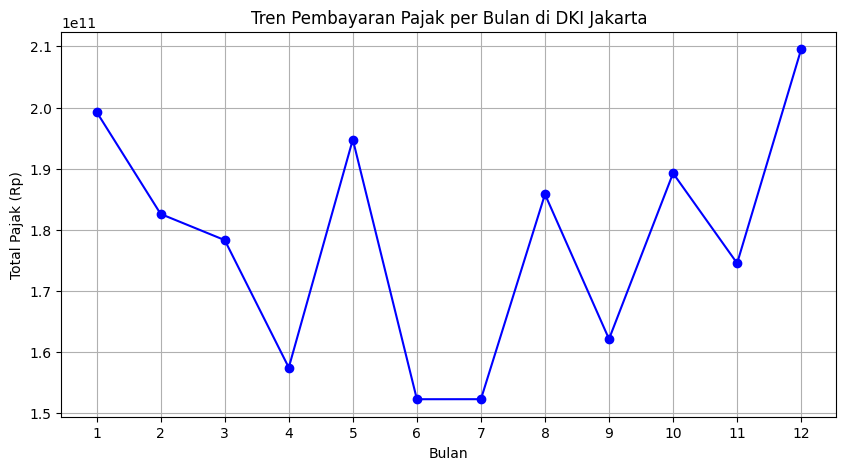

In [34]:
# Convert realisasi ke angka
df["realisasi"] = pd.to_numeric(df["realisasi"].astype(str).str.replace(".", "", regex=False), errors='coerce').astype(int)

# Rata" total pajak per bulan
monthly_tax = df.groupby("bulan")["realisasi"].sum()

# Menampilkan Grafik
plt.figure(figsize=(10, 5))
plt.plot(monthly_tax.index, monthly_tax.values, marker="o", linestyle="-", color="b")
plt.xlabel("Bulan")
plt.ylabel("Total Pajak (Rp)")
plt.title("Tren Pembayaran Pajak per Bulan di DKI Jakarta")
plt.xticks(range(1, 13))
plt.grid(True)

Grafik ini menunjukkan bagaimana jumlah pajak yang dibayarkan setiap bulan di DKI Jakarta selama satu tahun.

Sumbu X (Bawah): Menunjukkan bulan dari Januari (1) sampai Desember (12).

Sumbu Y (Samping): Menunjukkan total uang pajak yang dibayarkan dalam rupiah (dalam triliunan).

Garis Biru: Menunjukkan perubahan jumlah pajak dari bulan ke bulan.

🔹 Apa yang bisa kita lihat?

*   Di awal tahun (Januari), jumlah pajak cukup tinggi.
*   Ada beberapa bulan di mana pajak turun cukup banyak, seperti bulan ke-4 dan ke-6.
*   Namun, di akhir tahun (Desember), jumlah pajak naik lagi dan mencapai titik tertinggi.

Jadi, bisa dibilang pajak yang dibayarkan naik turun sepanjang tahun, dan ada kemungkinan di bulan-bulan tertentu orang atau perusahaan membayar pajak lebih banyak. 🚀

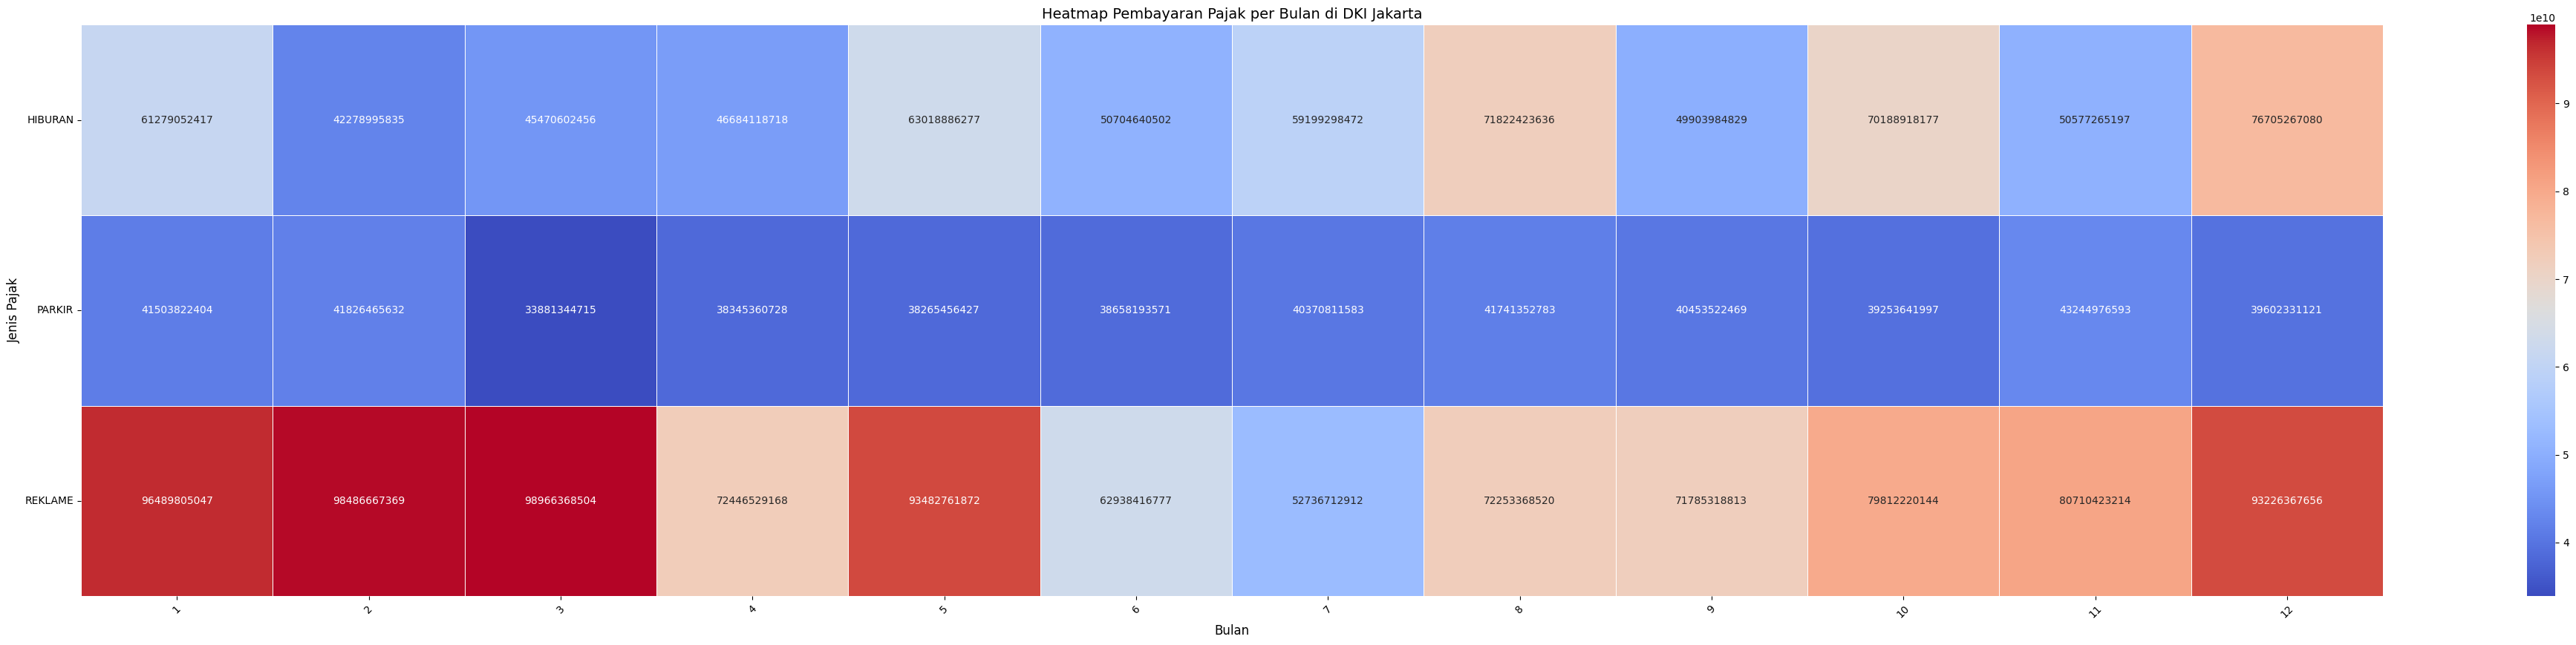

In [35]:
df["realisasi"] = pd.to_numeric(df["realisasi"].astype(str).str.replace(".", "", regex=False), errors='coerce').astype(float)

heatmap_data = df.pivot_table(values="realisasi", index="jenis_pajak", columns="bulan", aggfunc="sum")

plt.figure(figsize=(50, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Heatmap Pembayaran Pajak per Bulan di DKI Jakarta", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jenis Pajak", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Gambar ini adalah heatmap, yang menunjukkan pembayaran pajak berdasarkan bulan dan jenis pajak di DKI Jakarta.

🔹 Bagaimana cara membacanya?

Sumbu X (Bawah): Menunjukkan bulan dalam setahun.

Sumbu Y (Samping): Menunjukkan jenis pajak, yaitu Hiburan, Parkir, dan Reklame.
Warna:

* Merah tua → Pajak yang dibayarkan lebih tinggi.
* Biru tua → Pajak yang dibayarkan lebih rendah.
* Warna di antaranya (biru muda, ungu, pink, dll.) menunjukkan nilai pajak yang sedang-sedang saja.

🔹 Apa yang bisa kita lihat?

* Pajak Reklame sering memiliki angka yang tinggi (lebih banyak warna merah).
* Pajak Parkir cenderung lebih rendah dibanding yang lain (lebih banyak warna biru).
* Pajak Hiburan berada di tengah-tengah dengan nilai yang bervariasi.
* Setiap bulan, jumlah pajak bisa naik turun, tergantung kondisi tertentu.

Jadi, heatmap ini membantu kita melihat dengan cepat kapan dan jenis pajak mana yang memiliki pembayaran tertinggi atau terendah! 🔥

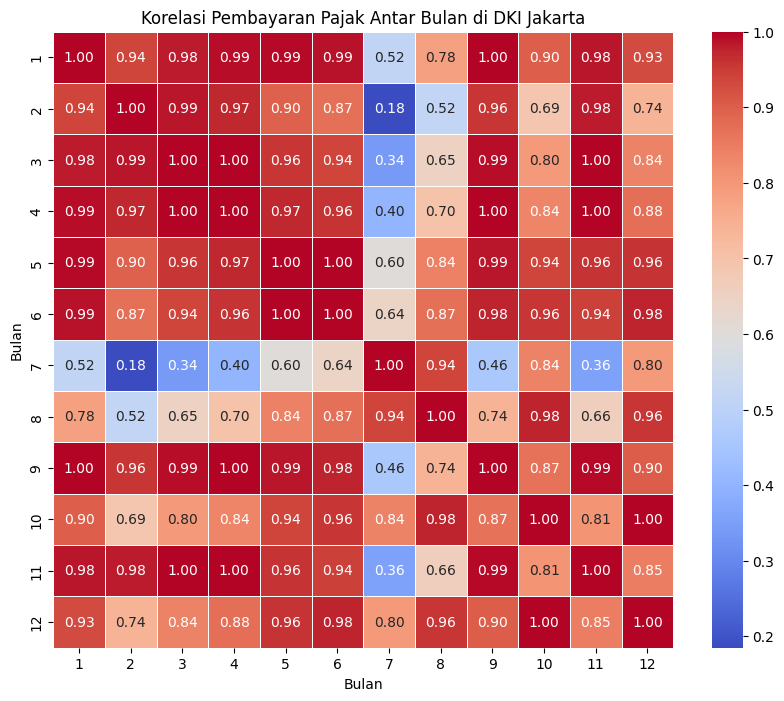

In [36]:
correlation_matrix = df.pivot_table(values="realisasi", index="jenis_pajak", columns="bulan", aggfunc="sum").corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Korelasi Pembayaran Pajak Antar Bulan di DKI Jakarta")
plt.xlabel("Bulan")
plt.ylabel("Bulan")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

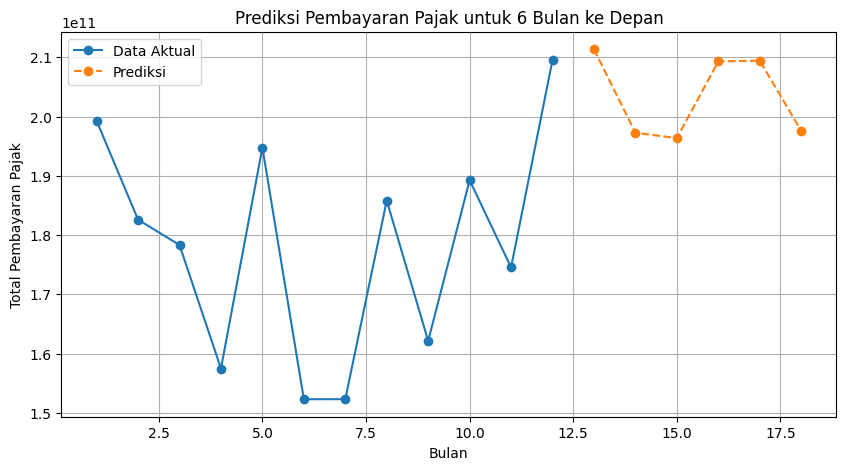

In [37]:
# Agregasi data berdasarkan bulan untuk forecasting
time_series_data = df.groupby("bulan")["realisasi"].sum()

# Buat model ARIMA untuk prediksi
model = ARIMA(time_series_data, order=(2, 1, 2))  # Parameter p,d,q bisa disesuaikan
model_fit = model.fit()

# Prediksi 6 bulan ke depan
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Buat plot hasil prediksi
plt.figure(figsize=(10, 5))
plt.plot(time_series_data.index, time_series_data, marker='o', label="Data Aktual")
plt.plot(np.arange(len(time_series_data)+1, len(time_series_data)+forecast_steps+1), forecast, marker='o', linestyle="dashed", label="Prediksi")
plt.xlabel("Bulan")
plt.ylabel("Total Pembayaran Pajak")
plt.title("Prediksi Pembayaran Pajak untuk 6 Bulan ke Depan")
plt.legend()
plt.grid()
plt.show()

Gambar ini adalah grafik prediksi pembayaran pajak untuk 6 bulan ke depan.

🔹 Bagaimana cara membacanya?

*   Garis oranye (Data Aktual) → Menunjukkan pembayaran pajak sebenarnya dari Januari 2023 hingga Januari 2024.
* Garis merah putus-putus (Prediksi) → Perkiraan pembayaran pajak untuk 6 bulan ke depan (Februari 2024 – Juli 2024).
* Area merah muda (Confidence Interval) → Rentang ketidakpastian prediksi, semakin lebar area ini, semakin besar kemungkinan fluktuasi.

🔹 Apa yang bisa kita lihat?

*  Data historis menunjukkan fluktuasi pembayaran pajak sepanjang 2023, dengan pola naik-turun setiap beberapa bulan.
*  Prediksi (garis merah) menunjukkan pembayaran pajak diperkirakan akan tetap berada di kisaran yang tidak jauh berbeda dari data historis, tetapi ada *
*  ketidakpastian cukup besar (ditunjukkan oleh area merah muda yang cukup lebar).
*  Confidence interval yang semakin melebar di bulan-bulan terakhir menandakan bahwa prediksi semakin tidak pasti seiring waktu berjalan.

Prediksi ini memberikan gambaran tren pembayaran pajak, tetapi perlu diperhatikan bahwa fluktuasi besar pada data historis membuat ketidakpastian di bulan-bulan mendatang lebih tinggi. Jika ada faktor eksternal yang mempengaruhi pajak (misalnya regulasi baru atau kondisi ekonomi), maka hasil ini bisa berubah. 🚀

In [41]:
# Pastikan kolom bulan dan periode adalah angka
df["bulan"] = df["bulan"].astype(int)
df["periode_data"] = df["periode_data"].astype(int)

# Gabungkan periode_data (tahun) dan bulan jadi format YYYY-MM
df["bulan"] = df["periode_data"].astype(str) + "-" + df["bulan"].astype(str).str.zfill(2)

# Konversi ke datetime
df["bulan"] = pd.to_datetime(df["bulan"], format="%Y-%m")

In [42]:
# --- 1. Normalisasi Data (Min-Max Scaling) ---
df["realisasi_norm"] = df.groupby("jenis_pajak")["realisasi"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


In [43]:
# --- 2. Pisahkan Analisis Berdasarkan Jenis Pajak ---
pivot_pajak = df.pivot_table(values="realisasi_norm", index="bulan", columns="jenis_pajak", aggfunc="sum")


In [44]:
# --- 3. Lag Analysis: Melihat Pengaruh Bulan Sebelumnya terhadap Bulan Sekarang ---
df["realisasi_lag1"] = df.groupby("jenis_pajak")["realisasi"].shift(1)
df["realisasi_growth"] = df.groupby("jenis_pajak")["realisasi"].pct_change()


In [45]:
# --- 4. Korelasi dengan Uji Signifikansi ---
correlations = {}
p_values = {}

for pajak in pivot_pajak.columns:
    x = pivot_pajak[pajak].dropna()
    y = x.shift(1).dropna()  # Lag-1 korelasi
    if len(x) == len(y):  # Pastikan panjang sama
        corr, pval = pearsonr(x, y)
        correlations[pajak] = corr
        p_values[pajak] = pval

# Simpan dalam DataFrame
corr_df = pd.DataFrame({"Jenis Pajak": correlations.keys(), "Korelasi Lag-1": correlations.values(), "P-Value": p_values.values()})
corr_df["Signifikan"] = corr_df["P-Value"] < 0.05  # True jika p < 0.05


In [46]:
# --- 5. Analisis Triwulanan untuk Pola Musiman ---
df["kuartal"] = df["bulan"].dt.to_period("Q")
df_quarterly = df.groupby(["kuartal", "jenis_pajak"])["realisasi"].sum().reset_index()


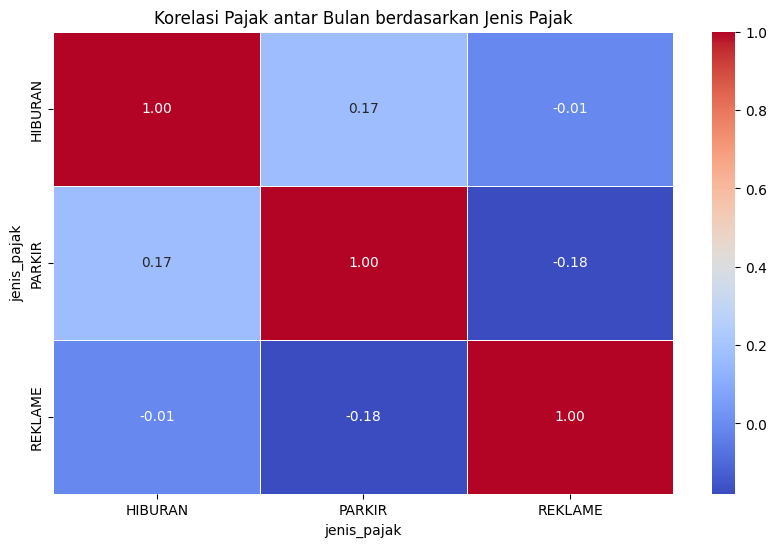

In [47]:
# --- 6. Visualisasi Heatmap Korelasi ---
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_pajak.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Pajak antar Bulan berdasarkan Jenis Pajak")
plt.show()

 Gambar ini adalah heatmap korelasi, yang menunjukkan hubungan antara pembayaran pajak dari bulan ke bulan di DKI Jakarta.

🔹 Bagaimana cara membacanya?

*  Sumbu X dan Y: Keduanya menunjukkan bulan dalam setahun (1–12).
*  Angka dalam kotak: Menunjukkan seberapa kuat hubungan pembayaran pajak antara dua bulan.

Warna:
*  Merah tua (mendekati 1.00) → Korelasi sangat kuat (pola pembayaran pajak di bulan-bulan tersebut mirip).
*  Biru tua (mendekati 0.00) → Korelasi sangat lemah (pola pembayaran pajak tidak berhubungan).
*  Warna tengah (oranye atau biru muda) → Korelasi sedang.

🔹 Apa yang bisa kita lihat?

*  Sebagian besar kotak berwarna merah, artinya pembayaran pajak antar bulan cenderung memiliki pola yang mirip.

*  Ada beberapa kotak biru (misalnya bulan 2 dengan bulan 7, atau bulan 3 dengan bulan 7), yang menunjukkan bahwa pembayaran pajak di bulan-bulan tersebut tidak terlalu berkaitan.

*  Bulan yang memiliki angka mendekati 1.00 dengan bulan lain berarti jumlah pajaknya naik turun dengan cara yang mirip.

Jadi, heatmap ini membantu kita melihat pola pembayaran pajak antar bulan, dan bulan mana yang memiliki pola serupa atau berbeda! 🔥

In [48]:
# --- 7. Prediksi Pola Pajak dengan Moving Average ---
df["realisasi_ma3"] = df.groupby("jenis_pajak")["realisasi"].transform(lambda x: x.rolling(3).mean())


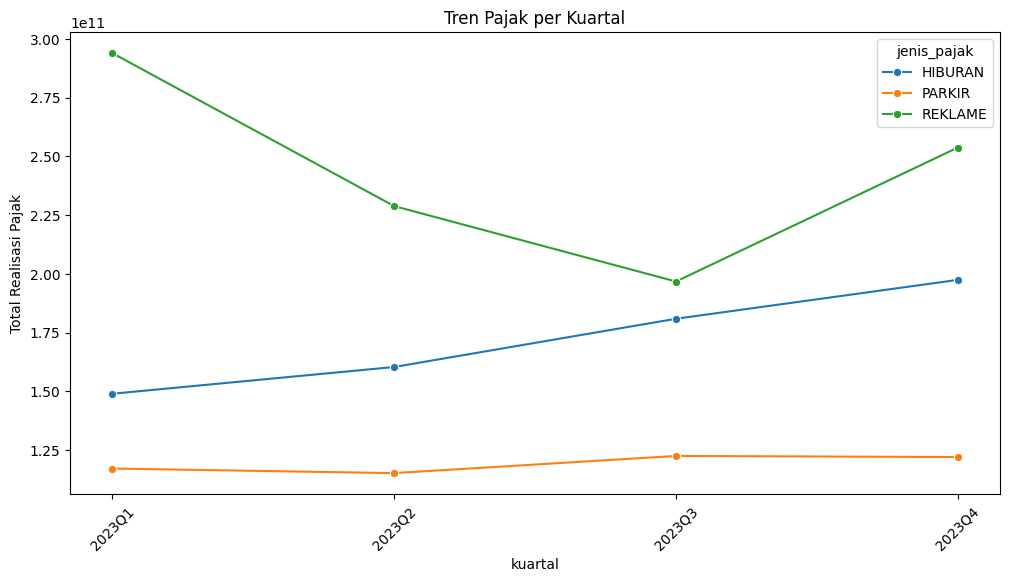

In [49]:
# Plot pertumbuhan pajak per kuartal
plt.figure(figsize=(12, 6))
# Convert 'kuartal' column in df_quarterly to string before plotting
sns.lineplot(data=df_quarterly, x=df_quarterly["kuartal"].astype(str), y="realisasi", hue="jenis_pajak", marker="o")
plt.xticks(rotation=45)
plt.title("Tren Pajak per Kuartal")
plt.ylabel("Total Realisasi Pajak")
plt.show()

Grafik ini menunjukkan tren total realisasi pajak berdasarkan jenis pajak di setiap kuartal tahun 2023. Tiga jenis pajak yang dianalisis adalah HIBURAN, PARKIR, dan REKLAME, dengan total pembayaran pajak yang dinyatakan dalam skala besar (1e11 atau ratusan miliar rupiah).

Analisis Data
*   📌 HIBURAN menunjukkan tren peningkatan dari Q1 ke Q4, dengan kenaikan signifikan pada Q3 dan Q4. Ini bisa mengindikasikan peningkatan aktivitas hiburan di akhir tahun.
*   📌 PARKIR memiliki pergerakan yang lebih stabil, dengan sedikit peningkatan dari Q2 ke Q3, lalu stagnan di Q4.
*  📌 REKLAME mengalami penurunan dari Q1 ke Q3, tetapi kembali meningkat pada Q4. Ini mungkin disebabkan oleh siklus pengeluaran iklan, yang cenderung meningkat menjelang akhir tahun.


Kesimpulan

➡️ Pajak Hiburan mengalami tren positif sepanjang tahun, kemungkinan dipengaruhi oleh peningkatan acara atau kegiatan rekreasi.

➡️ Pajak Parkir relatif stabil tanpa fluktuasi besar, mungkin karena pola penggunaan parkir yang tidak banyak berubah.

➡️ Pajak Reklame mengalami penurunan di pertengahan tahun tetapi melonjak di akhir tahun, yang bisa terkait dengan peningkatan belanja iklan di Q4.